## Extracting NFLX Datasets

This notebook shows how to extract datasets once they have been collected. Please refer to the [distributed dataset collection tools](https://github.com/AlgoTraders/stock-analysis-engine#distributed-automation-with-docker) for quickly downloading some data.

### Start Services

To develop jupyter notebooks start the [notebook-integration](https://github.com/AlgoTraders/stock-analysis-engine/blob/master/compose/notebook-integration.yml) containers using docker-compose. Here's the command to start it:
```
./compose/start.sh -j
```
Verify the containers are running:
```
docker ps -a
```

The sample data for this guide was collected using the automated dataset collection:
```
./compose/start.sh -c
```

### Verify Datasets are in Redis

By default the datasets are [automatically archived in S3](http://localhost:9000/minio/pricing/) and cached in Redis. Until S3 extraction is supported, let's confirm the datasets are in Redis before continuing.

These commands assume you have the [redis client installed](https://redis.io/download):

```
redis-cli
127.0.0.1:6379> select 4
OK
127.0.0.1:6379[4]> keys NFLX_*
 1) "NFLX_2018-10-15_options"
 2) "NFLX_2018-10-15_news1"
 3) "NFLX_2018-10-15_company"
 4) "NFLX_2018-10-15_stats"
 5) "NFLX_2018-10-15_minute"
 6) "NFLX_2018-10-15_pricing"
 7) "NFLX_2018-10-15_financials"
 8) "NFLX_2018-10-15_quote"
 9) "NFLX_2018-10-15_daily"
10) "NFLX_2018-10-15_news"
11) "NFLX_2018-10-15_peers"
12) "NFLX_2018-10-15"
13) "NFLX_2018-10-15_dividends"
14) "NFLX_2018-10-15_earnings"
127.0.0.1:6379[4]> 
```

### Create Imports and Logger

In [1]:
import datetime
import analysis_engine.charts as ae_charts
from IPython.display import display
from IPython.display import HTML
from analysis_engine.api_requests import get_ds_dict
from analysis_engine.consts import SUCCESS
from analysis_engine.consts import ppj
from analysis_engine.consts import IEX_MINUTE_DATE_FORMAT
from analysis_engine.consts import IEX_DAILY_DATE_FORMAT
from analysis_engine.consts import IEX_TICK_DATE_FORMAT
from analysis_engine.utils import utc_now_str
from analysis_engine.utils import get_last_close_str
from spylunking.log.setup_logging import build_colorized_logger

log_label = 'intro-ds-1'
log = build_colorized_logger(name=log_label, handler_name='jupyter')

### Select a Ticker and Date

In [2]:
ticker = 'NFLX'
today_str = utc_now_str()
last_close_str = get_last_close_str()

log.info('Using ticker={} with last close={}'.format(ticker, last_close_str))

INFO - Using ticker=NFLX with last close=2018-10-15


### Load Cache Keys

In [3]:
cache_dict = get_ds_dict(ticker=ticker, label=log_label)
log.info('Cache keys for ticker={} and last close={} cache_dict={}'.format(ticker, last_close_str, ppj(cache_dict)))

INFO - Cache keys for ticker=NFLX and last close=2018-10-15 cache_dict={
    "company": "NFLX_2018-10-15_company",
    "created": "2018-10-16 00:01:45",
    "daily": "NFLX_2018-10-15_daily",
    "date": "2018-10-16",
    "dividends": "NFLX_2018-10-15_dividends",
    "ds_id": null,
    "earnings": "NFLX_2018-10-15_earnings",
    "financials": "NFLX_2018-10-15_financials",
    "label": "intro-ds-1",
    "minute": "NFLX_2018-10-15_minute",
    "news": "NFLX_2018-10-15_news",
    "news1": "NFLX_2018-10-15_news1",
    "options": "NFLX_2018-10-15_options",
    "peers": "NFLX_2018-10-15_peers",
    "pricing": "NFLX_2018-10-15_pricing",
    "stats": "NFLX_2018-10-15_stats",
    "quote": "NFLX_2018-10-15_quote",
    "ticker": "NFLX",
    "version": 1
}


### Extracting Minute Cache

In [4]:
from analysis_engine.iex.extract_df_from_redis import extract_minute_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, minute_df = extract_minute_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:45,099 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:45,103 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - minute - start
2018-10-16 00:01:45,108 - analysis_engine.extract_utils - INFO - intro-ds-1 - minute - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_minute s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_minute
2018-10-16 00:01:45,112 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_minute
2018-10-16 00:01:45,116 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_minute client
2018-10-16 00:01:45,124 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_minute encoding=utf-8
2018-10-16 00:01:45,126 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_minute serializer=json
201

2018-10-16 00:01:45,225 - intro-ds-1 - INFO - ticker=NFLX creating chart date=2018-10-16 00:01:45
2018-10-16 00:01:45,235 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - start
2018-10-16 00:01:45,241 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - dropna_for_all


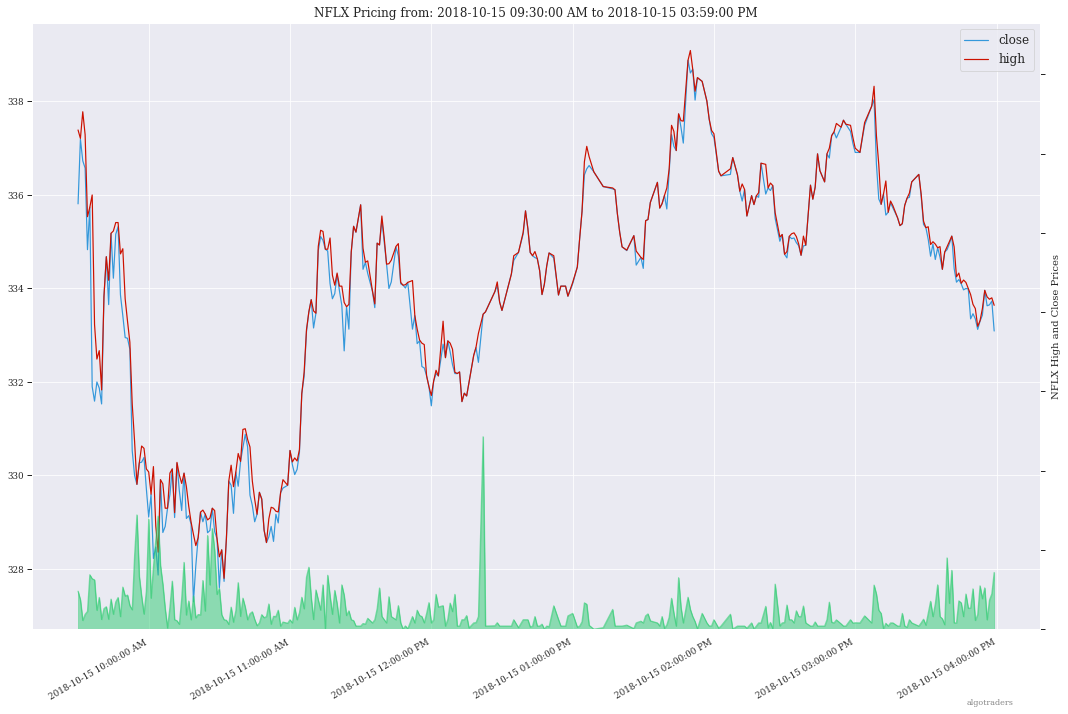

2018-10-16 00:01:45,896 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - done status=SUCCESS err=None


In [5]:
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_MINUTE_DATE_FORMAT,
        df=minute_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['minute']))

### Extracting Quote Cache

In [6]:
from analysis_engine.iex.extract_df_from_redis import extract_quote_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, quote_df = extract_quote_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:45,932 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:45,935 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - daily - start
2018-10-16 00:01:45,938 - analysis_engine.extract_utils - INFO - intro-ds-1 - daily - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_daily s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_daily
2018-10-16 00:01:45,941 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_daily
2018-10-16 00:01:45,945 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_daily client
2018-10-16 00:01:45,962 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_daily encoding=utf-8
2018-10-16 00:01:45,965 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_daily serializer=json
2018-10-16 

2018-10-16 00:01:46,078 - intro-ds-1 - INFO - ticker=NFLX creating chart date=2018-10-16 00:01:45
2018-10-16 00:01:46,085 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - start
2018-10-16 00:01:46,089 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - dropna_for_all


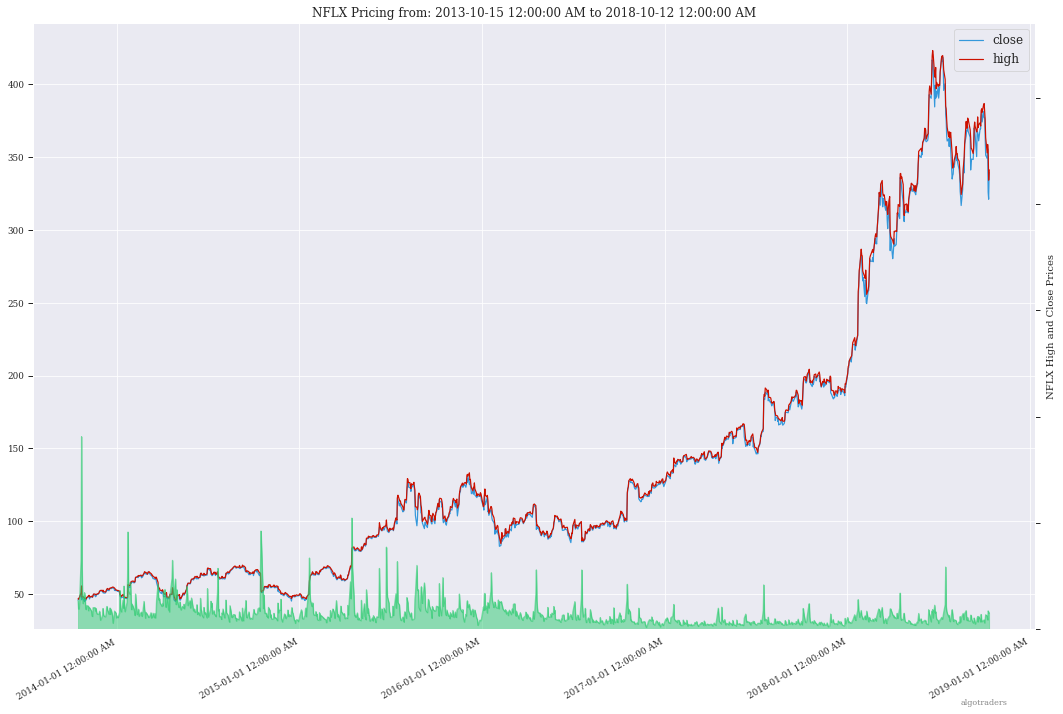

2018-10-16 00:01:46,827 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - done status=SUCCESS err=None


In [7]:
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_TICK_DATE_FORMAT,
        df=quote_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['quote']))

### Extracting Daily Cache

In [8]:
from analysis_engine.iex.extract_df_from_redis import extract_daily_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, daily_df = extract_daily_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:46,843 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:46,851 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - daily - start
2018-10-16 00:01:46,853 - analysis_engine.extract_utils - INFO - intro-ds-1 - daily - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_daily s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_daily
2018-10-16 00:01:46,857 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_daily
2018-10-16 00:01:46,861 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_daily client
2018-10-16 00:01:46,872 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_daily encoding=utf-8
2018-10-16 00:01:46,876 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_daily serializer=json
2018-10-16 

2018-10-16 00:01:46,971 - intro-ds-1 - INFO - ticker=NFLX creating chart date=2018-10-16 00:01:45
2018-10-16 00:01:46,979 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - start
2018-10-16 00:01:46,985 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - dropna_for_all


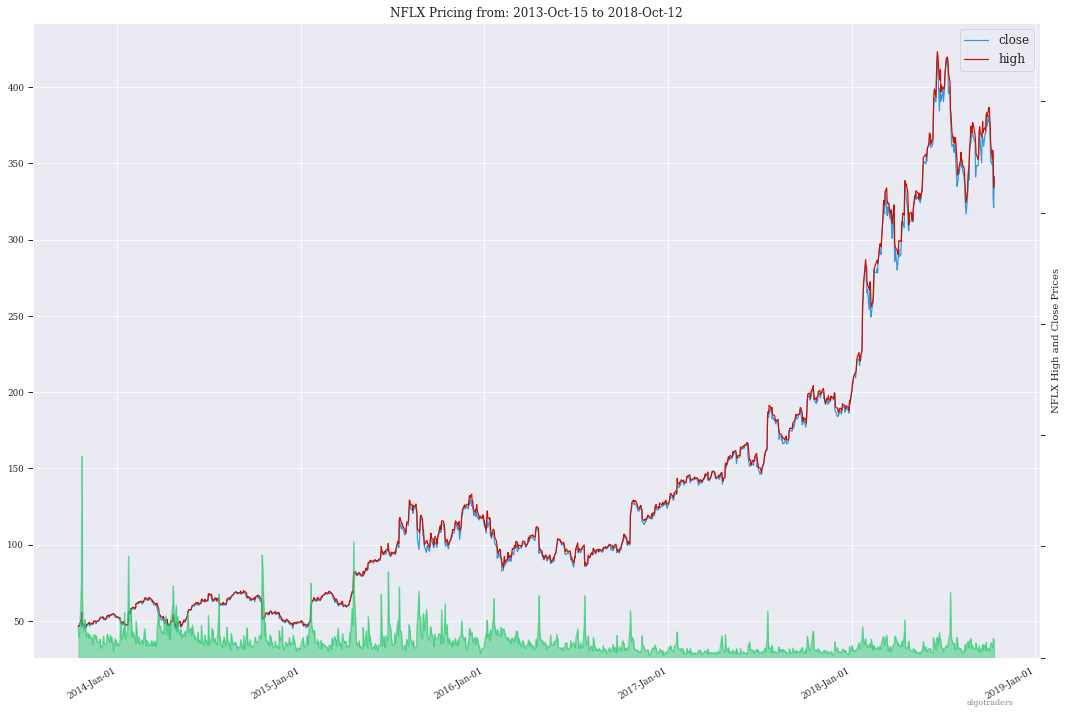

2018-10-16 00:01:47,687 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - done status=SUCCESS err=None


In [9]:
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_DAILY_DATE_FORMAT,
        df=daily_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['daily']))

### Extracting Stats Cache

In [10]:
from analysis_engine.iex.extract_df_from_redis import extract_stats_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, stats_df = extract_stats_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:47,701 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:47,706 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - stats - start
2018-10-16 00:01:47,711 - analysis_engine.extract_utils - INFO - intro-ds-1 - stats - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_stats s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_stats
2018-10-16 00:01:47,713 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_stats
2018-10-16 00:01:47,716 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_stats client
2018-10-16 00:01:47,723 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_stats encoding=utf-8
2018-10-16 00:01:47,727 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_stats serializer=json
2018-10-16 

In [11]:
if extract_status == SUCCESS:
    display(stats_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['stats']))

,EBITDA,EPSSurpriseDollar,EPSSurprisePercent,beta,cash,companyName,consensusEPS,day200MovingAvg,day30ChangePercent,day50MovingAvg,...,shortInterest,shortRatio,ttmEPS,week52change,week52high,week52low,year1ChangePercent,year2ChangePercent,year5ChangePercent,ytdChangePercent
0,377087000,NaN,0,1.027461,4569264000,Netflix Inc.,0.68,325.055,-0.07648,354.2644,...,16396960,1.82,2.19,73.3687,423.2056,178.38,0.733687,2.412663,6.388855,0.688765


### Extracting Peers Cache

In [12]:
from analysis_engine.iex.extract_df_from_redis import extract_peers_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, peers_df = extract_peers_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:47,876 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:47,880 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - peers - start
2018-10-16 00:01:47,884 - analysis_engine.extract_utils - INFO - intro-ds-1 - peers - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_peers s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_peers
2018-10-16 00:01:47,888 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_peers
2018-10-16 00:01:47,893 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_peers client
2018-10-16 00:01:47,903 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_peers encoding=utf-8
2018-10-16 00:01:47,913 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_peers serializer=json
2018-10-16 

In [13]:
if extract_status == SUCCESS:
    display(peers_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['peers']))

,peer
0,BCE
1,AMZN
2,CMCSA
3,DISH
4,DIS
5,P
6,VIAB
7,FOXA


### Extracting News from IEX Cache

In [14]:
from analysis_engine.iex.extract_df_from_redis import extract_news_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, news_iex_df = extract_news_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:47,979 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:47,991 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - news - start
2018-10-16 00:01:47,997 - analysis_engine.extract_utils - INFO - intro-ds-1 - news - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_news1 s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_news1
2018-10-16 00:01:48,001 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_news1
2018-10-16 00:01:48,005 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_news1 client
2018-10-16 00:01:48,012 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_news1 encoding=utf-8
2018-10-16 00:01:48,018 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_news1 serializer=json
2018-10-16 00

In [15]:
if extract_status == SUCCESS:
    display(news_iex_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['news1']))

,headline,image,related,source,summary,url
0,"Netflix To Report Earnings On Tuesday, The Fir...",https://api.iextrading.com/1.0/stock/nflx/news...,"CON102,Earnings,ENT10210,Financial,Investment ...",SeekingAlpha,Video streaming giant Netflix ( NFLX ) repo...,https://api.iextrading.com/1.0/stock/nflx/arti...
1,Tech tumbles again - three experts weigh in on...,https://api.iextrading.com/1.0/stock/nflx/news...,"AAPL,AMZN,GOOGL,NFLX",CNBC,No summary available.,https://api.iextrading.com/1.0/stock/nflx/arti...
2,Netflix earnings preview,https://api.iextrading.com/1.0/stock/nflx/news...,"CON102,ENT10210,MED10210023,NASDAQ01,NFLX,WOMP...",SeekingAlpha,Netflix (NASDAQ: NFLX )is due to report Q...,https://api.iextrading.com/1.0/stock/nflx/arti...
3,Netflix is vulnerable to another sell-off afte...,https://api.iextrading.com/1.0/stock/nflx/news...,NFLX,CNBC,No summary available.,https://api.iextrading.com/1.0/stock/nflx/arti...
4,Art Cashin: The stock market is like someone s...,https://api.iextrading.com/1.0/stock/nflx/news...,"AAPL,NFLX",CNBC,No summary available.,https://api.iextrading.com/1.0/stock/nflx/arti...
5,Why Snapchat Snapped,https://api.iextrading.com/1.0/stock/nflx/news...,"AMZN,CON102,FB,NASDAQ01,NFLX,RET10217,SNAP,SPE...",SeekingAlpha,"To the dismay of tech shares, the tech indu...",https://api.iextrading.com/1.0/stock/nflx/arti...
6,High-flying PTs on Netflix reeled in,https://api.iextrading.com/1.0/stock/nflx/news...,"CON102,ENT10210,MED10210023,NASDAQ01,NFLX",SeekingAlpha,Raymond James reels in its price target o...,https://api.iextrading.com/1.0/stock/nflx/arti...
7,Netflix price target slashed by Goldman Sachs ...,https://api.iextrading.com/1.0/stock/nflx/news...,NFLX,CNBC,No summary available.,https://api.iextrading.com/1.0/stock/nflx/arti...
8,Game Plan For The Week - Cramer's Mad Money (1...,https://api.iextrading.com/1.0/stock/nflx/news...,"ABT,AXP,BAC,BAN10320,BAN10320043,BMY,CSX,Finan...",SeekingAlpha,Stocks discussed on the in-depth sess...,https://api.iextrading.com/1.0/stock/nflx/arti...
9,Netflix stock 'looks broken' ahead of its earn...,https://api.iextrading.com/1.0/stock/nflx/news...,"AAPL,DIS,NFLX",CNBC,No summary available.,https://api.iextrading.com/1.0/stock/nflx/arti...


### Extracting Financials Cache

In [16]:
from analysis_engine.iex.extract_df_from_redis import extract_financials_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, financials_df = extract_financials_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:48,108 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:48,119 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - financials - start
2018-10-16 00:01:48,122 - analysis_engine.extract_utils - INFO - intro-ds-1 - financials - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_financials s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_financials
2018-10-16 00:01:48,125 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_financials
2018-10-16 00:01:48,130 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_financials client
2018-10-16 00:01:48,136 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_financials encoding=utf-8
2018-10-16 00:01:48,146 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-1

In [17]:
if extract_status == SUCCESS:
    display(financials_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['financials']))

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
0,1350857000,-518239000,2289867000,9346889000,3913994000,NaN,1617403000,384349000,1155190000,-85410000,462213000,3907270000,317213000,4496600000,NFLX,22663537000,3906357000,NaN,NaN,3907270000
1,-230495000,-236757000,2196075000,7817576000,2599477000,NaN,1504781000,290124000,1058203000,41080000,446578000,3700856000,300730000,4020730000,NFLX,20152797000,2593666000,NaN,NaN,3700856000
2,1074145000,-487957000,2107354000,7669974000,2822795000,NaN,1178401000,185517000,933098000,25740000,245303000,3285755000,273351000,3581956000,NFLX,19012742000,2822795000,NaN,NaN,3285755000
3,-182993000,-419607000,1992980000,6385348000,1746469000,NaN,991879000,129590000,783252000,50830000,208627000,2984859000,255236000,3327361000,NFLX,16951540000,1746469000,NaN,NaN,2984859000


### Extracting Earnings Cache

In [18]:
from analysis_engine.iex.extract_df_from_redis import extract_earnings_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, earnings_df = extract_earnings_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:48,249 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:48,254 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - earnings - start
2018-10-16 00:01:48,259 - analysis_engine.extract_utils - INFO - intro-ds-1 - earnings - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_earnings s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_earnings
2018-10-16 00:01:48,262 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_earnings
2018-10-16 00:01:48,265 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_earnings client
2018-10-16 00:01:48,271 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_earnings encoding=utf-8
2018-10-16 00:01:48,282 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_earnings ser

In [19]:
if extract_status == SUCCESS:
    display(earnings_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['earnings']))

,EPSSurpriseDollar,actualEPS,announceTime,consensusEPS,estimatedChangePercent,estimatedEPS,fiscalEndDate,fiscalPeriod,numberOfEstimates,symbol,symbolId,yearAgo,yearAgoChangePercent
0,0.05,0.85,AMC,0.80,4.333333,0.80,1530316800000,Q2 2018,19,NFLX,4784,0.15,4.666667
1,0.01,0.64,AMC,0.63,0.575000,0.63,1522454400000,Q1 2018,16,NFLX,4784,0.40,0.600000
2,NaN,0.41,AMC,0.41,1.733333,0.41,1514678400000,Q4 2017,16,NFLX,4784,0.15,1.733333
3,-0.03,0.29,AMC,0.32,1.666667,0.32,1506729600000,Q3 2017,17,NFLX,4784,0.12,1.416667


### Extracting Dividends Cache

In [20]:
from analysis_engine.iex.extract_df_from_redis import extract_dividends_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, dividends_df = extract_dividends_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:48,399 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:48,404 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - dividends - start
2018-10-16 00:01:48,408 - analysis_engine.extract_utils - INFO - intro-ds-1 - dividends - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_dividends s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_dividends
2018-10-16 00:01:48,413 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_dividends
2018-10-16 00:01:48,419 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_dividends client
2018-10-16 00:01:48,430 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_dividends encoding=utf-8
2018-10-16 00:01:48,437 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_divid

In [21]:
if extract_status == SUCCESS:
    display(dividends_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['dividends']))

""


### Extracting Company Cache

In [22]:
from analysis_engine.iex.extract_df_from_redis import extract_company_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, company_df = extract_company_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:48,502 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:48,510 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - company - start
2018-10-16 00:01:48,514 - analysis_engine.extract_utils - INFO - intro-ds-1 - company - START - ds_id=NFLX scrub_mode=NO_SORT redis=True redis_address=redis-jay:6379@4 redis_key=NFLX_2018-10-15_company s3=True s3_address=minio-jay:9000 s3_bucket=pricing s3_key=NFLX_2018-10-15_company
2018-10-16 00:01:48,529 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-15_company
2018-10-16 00:01:48,537 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_company client
2018-10-16 00:01:48,544 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_company encoding=utf-8
2018-10-16 00:01:48,549 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_company serializer=json


In [23]:
if extract_status == SUCCESS:
    display(company_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['company']))

,CEO,companyName,description,exchange,industry,issueType,sector,tags,website
0,Reed Hastings,Netflix Inc.,Netflix Inc provides multimedia content throug...,Nasdaq Global Select,Entertainment,cs,Consumer Cyclical,"[Consumer Cyclical, Media - Diversified, Enter...",http://www.netflix.com


### Extracting Option Calls Cache

In [24]:
from analysis_engine.yahoo.extract_df_from_redis import extract_option_calls_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, option_calls_df = extract_option_calls_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:48,648 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:48,652 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1-calls - options_yahoo - start - redis_key=NFLX_2018-10-15_options s3_key=NFLX_2018-10-15_options
2018-10-16 00:01:48,655 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-calls get key=NFLX_2018-10-15_options new client=redis-jay:6379@4
2018-10-16 00:01:48,663 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-calls decoding key=NFLX_2018-10-15_options encoding=utf-8
2018-10-16 00:01:48,666 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-calls deserial key=NFLX_2018-10-15_options serializer=json
2018-10-16 00:01:48,671 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-calls - found key=NFLX_2018-10-15_options
2018-10-16 00:01:48,677 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1-calls - options_yahoo redis get data key=NFLX_2018-10-15_options status=SUC

In [25]:
if extract_status == SUCCESS:
    display(option_calls_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['options']))

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,117.25,114.50,-7.559998,REGULAR,NFLX181019C00225000,USD,1539907200,3.583741,True,113.40,1539353884,11,-7.496280,225.0,3
1,103.90,102.85,4.810005,REGULAR,NFLX181019C00230000,USD,1539907200,1.625002,True,98.30,1539612250,7,5.144941,230.0,1
2,106.05,103.80,24.820000,REGULAR,NFLX181019C00235000,USD,1539907200,3.147463,True,135.00,1534964184,4,18.385185,235.0,1
3,94.45,93.00,1.979996,REGULAR,NFLX181019C00240000,USD,1539907200,1.676759,True,93.20,1539620331,6,2.170572,240.0,4
4,96.80,94.00,109.760000,REGULAR,NFLX181019C00245000,USD,1539907200,2.936770,True,109.76,1535727778,5,100.000000,245.0,10
5,84.65,83.15,-6.750000,REGULAR,NFLX181019C00250000,USD,1539907200,1.569338,True,79.75,1539613329,101,-7.803468,250.0,2
6,88.00,85.00,-54.180000,REGULAR,NFLX181019C00255000,USD,1539907200,2.803714,True,65.45,1539283571,48,-82.780754,255.0,15
7,75.10,73.55,2.339996,REGULAR,NFLX181019C00260000,USD,1539907200,1.518557,True,75.99,1539628537,33,3.177184,260.0,17
8,77.95,74.40,-32.449997,REGULAR,NFLX181019C00265000,USD,1539907200,2.488285,True,57.50,1539285189,121,-56.434776,265.0,23
9,72.95,69.70,16.789997,REGULAR,NFLX181019C00270000,USD,1539907200,2.370365,True,69.74,1539371534,49,31.709152,270.0,10


### Extracting Option Puts Cache

In [26]:
from analysis_engine.yahoo.extract_df_from_redis import extract_option_puts_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, option_puts_df = extract_option_puts_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:48,890 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:48,898 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1-puts - options_yahoo - start - redis_key=NFLX_2018-10-15_options s3_key=NFLX_2018-10-15_options
2018-10-16 00:01:48,908 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-puts get key=NFLX_2018-10-15_options new client=redis-jay:6379@4
2018-10-16 00:01:48,915 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-puts decoding key=NFLX_2018-10-15_options encoding=utf-8
2018-10-16 00:01:48,918 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-puts deserial key=NFLX_2018-10-15_options serializer=json
2018-10-16 00:01:48,926 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1-puts - found key=NFLX_2018-10-15_options
2018-10-16 00:01:48,933 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1-puts - options_yahoo redis get data key=NFLX_2018-10-15_options status=SUCCESS
2

In [27]:
if extract_status == SUCCESS:
    display(option_puts_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['options']))

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,0.24,0.20,-0.080000,REGULAR,NFLX181019P00225000,USD,1539907200,1.685548,False,0.22,1539633598,956,-26.666672,225.0,1719
1,0.26,0.25,-0.150000,REGULAR,NFLX181019P00230000,USD,1539907200,1.634767,False,0.26,1539633331,296,-36.585365,230.0,362
2,0.35,0.29,-0.160000,REGULAR,NFLX181019P00235000,USD,1539907200,1.602541,False,0.33,1539633389,907,-32.653060,235.0,129
3,0.44,0.35,-0.100000,REGULAR,NFLX181019P00240000,USD,1539907200,1.567385,False,0.40,1539633286,511,-19.999998,240.0,671
4,0.54,0.48,-0.220000,REGULAR,NFLX181019P00245000,USD,1539907200,1.544924,False,0.50,1539633535,356,-30.555557,245.0,190
5,0.66,0.61,-0.150000,REGULAR,NFLX181019P00250000,USD,1539907200,1.514651,False,0.63,1539633577,972,-19.230766,250.0,1288
6,0.81,0.67,-0.230000,REGULAR,NFLX181019P00255000,USD,1539907200,1.466800,False,0.75,1539633383,563,-23.469390,255.0,192
7,1.01,0.93,-0.170000,REGULAR,NFLX181019P00260000,USD,1539907200,1.453616,False,0.95,1539633569,1290,-15.178574,260.0,595
8,1.35,1.15,-0.210000,REGULAR,NFLX181019P00265000,USD,1539907200,1.437991,False,1.15,1539633437,1097,-15.441179,265.0,436
9,1.65,1.43,-0.140000,REGULAR,NFLX181019P00270000,USD,1539907200,1.410403,False,1.46,1539633566,1427,-8.749999,270.0,1629


### Extracting Pricing from Yahoo Cache

In [28]:
from analysis_engine.yahoo.extract_df_from_redis import extract_pricing_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, pricing_df = extract_pricing_dataset(cache_dict)
log.info('extracting - done - ticker={}'.format(ticker))

2018-10-16 00:01:49,141 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:49,147 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1 - pricing_yahoo - start - redis_key=NFLX_2018-10-15_pricing s3_key=NFLX_2018-10-15_pricing
2018-10-16 00:01:49,152 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_pricing new client=redis-jay:6379@4
2018-10-16 00:01:49,157 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_pricing encoding=utf-8
2018-10-16 00:01:49,160 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_pricing serializer=json
2018-10-16 00:01:49,164 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 - found key=NFLX_2018-10-15_pricing
2018-10-16 00:01:49,167 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1 - pricing_yahoo redis get data key=NFLX_2018-10-15_pricing status=SUCCESS
2018-10-16 00:01:49,170 - analy

In [29]:
if extract_status == SUCCESS:
    display(pricing_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['pricing']))

,language,region,quoteType,quoteSourceName,currency,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChangePercent,...,market,symbol,high,low,open,close,volume,date,market_time,post_market_time
0,en-US,US,EQUITY,Nasdaq Real Time Price,USD,0.501301,1539647879,334.8,1.669983,-1.893625,...,us_market,NFLX,339.2,327.0,337.63,339.56,10775140,2018-10-15,2018-10-15 20:00:01,2018-10-15 23:57:59


### Extracting News from Yahoo Cache

In [30]:
from analysis_engine.yahoo.extract_df_from_redis import extract_yahoo_news_dataset

log.info('extracting - start - ticker={}'.format(ticker))
extract_status, news_yahoo_df = extract_yahoo_news_dataset(cache_dict)
log.info('extracting - end - ticker={}'.format(ticker))

2018-10-16 00:01:49,284 - intro-ds-1 - INFO - extracting - start - ticker=NFLX
2018-10-16 00:01:49,297 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1 - news_yahoo - start - redis_key=NFLX_2018-10-15_news s3_key=NFLX_2018-10-15_news
2018-10-16 00:01:49,301 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-15_news new client=redis-jay:6379@4
2018-10-16 00:01:49,306 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-15_news encoding=utf-8
2018-10-16 00:01:49,310 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-15_news serializer=json
2018-10-16 00:01:49,313 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 - found key=NFLX_2018-10-15_news
2018-10-16 00:01:49,317 - analysis_engine.yahoo.extract_df_from_redis - INFO - intro-ds-1 - news_yahoo redis get data key=NFLX_2018-10-15_news status=SUCCESS
2018-10-16 00:01:49,327 - analysis_engine.yahoo.extract_df

In [31]:
if extract_status == SUCCESS:
    display(news_yahoo_df)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, cache_dict['news']))

2018-10-16 00:01:49,357 - intro-ds-1 - ERROR - ticker=NFLX - did not extract a dataset from redis_key=NFLX_2018-10-15_news
